In [1]:
import lightgbm
print(lightgbm.__version__)

3.0.0


### 위스콘신 유방암 예측

In [2]:
# LightGBM - LGBMClassifier => 분류 : sklearn wrapper
import numpy as np
import pandas as pd


from lightgbm import LGBMClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [5]:
# 데이터 로딩
dataset = load_breast_cancer()

# 학습/테스트 사용할 데이터 저장
ftr = dataset.data

# 답 저장
target = dataset.target


In [6]:
# 학습 데이터 / 테스트 데이터 분리
X_train, X_test, y_train, y_test =\
train_test_split(
      ftr
    , target
    , test_size=0.2
    , random_state=156
)

In [7]:
# 모델 객체 생성
# 핵심 파라미터 : tree count => n_estimators=400 트리를 400개 생성
lgbm_clf = LGBMClassifier(n_estimators=400)

In [9]:
# 학습 => 모델 생성
# 평가 데이터 지정
evals = [(X_test, y_test)]

# 학습 => 모델 생성
lgbm_clf.fit(
      X_train
    , y_train
    , early_stopping_rounds=100
    , eval_set=evals # 검증 데이터 지정
    , verbose=True # 실행 결과 확인
)

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

LGBMClassifier(n_estimators=400)

In [10]:
preds = lgbm_clf.predict(X_test)

In [11]:
# 정확도 출력
# 정밀도
# 재현율
# 


SyntaxError: unexpected EOF while parsing (<ipython-input-11-e3b213ea5e7d>, line 5)

In [16]:
# 정확도 출력
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test,pred)
    accu = accuracy_score(y_test,pred)
    preci = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    
    out_str = '정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, AUC : {3:.4f}'
    print(out_str.format(accu,preci, recall, roc_auc))

In [17]:
get_clf_eval(y_test, preds)

오차행렬
[[33  4]
 [ 1 76]]
정확도 : 0.9561, 정밀도 : 0.9500, 재현율 : 0.9870, AUC : 0.9395


In [19]:
# 중요 피처 출력
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

AttributeError: 'Rectangle' object has no property 'feature_names'

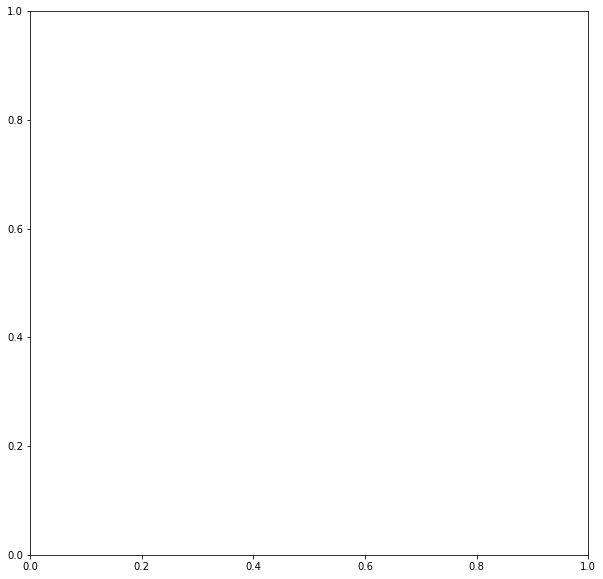

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
plot_importance(
      lgbm_clf
    , ax=ax
    , feature_names=dataset.feature_names
)